In [8]:
import sys
import os

import numpy as np
import pandas as pd
import geopandas as gpd

import geoviews as gv
import geoviews.feature as gf
from geoviews import opts, tile_sources as gvts

import cartopy.crs as ccrs

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import TwoSlopeNorm

gv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [46]:
plot_data = ['healpy_3_LAEA_step2.fgb',
             'healpy_4_LAEA_step2.fgb',
             'healpy_5_LAEA_step2.fgb',
             # 'healpy_6_LAEA_step2.fgb'
            ]

In [47]:
!ogrinfo ../cell_stats/results_healpy/healpy_3_LAEA_step2.fgb

Agent pid 87642
INFO: Open of `../cell_stats/results_healpy/healpy_3_LAEA_step2.fgb'
      using driver `FlatGeobuf' successful.
1: healpy_3_LAEA_step2 (Polygon)


In [48]:
grids = {}

for datafile in plot_data:
    title = " ".join(datafile.split("_")[:-3])
    grid = gpd.read_file("../cell_stats/results_healpy/" + datafile, driver="FlatGeobuf")

    # remove bogus cells for nice plotting
    grid = grid[~grid['crossed']].dropna(subset=["perimeter", "area", "ipq"])
    # grid = grid[(grid['area']>grid['area'].quantile(0.001)) & (grid['area']<grid['area'].quantile(0.999))]
    
    # for the normalised area
    grid['norm_area'] = grid['area']/grid['area'].mean()
    
    grids.update({ title: grid })

In [49]:
for gg in grids.keys():
    print(f"{gg}: cells {len(grids[gg])}")

healpy: cells 12161


In [50]:
world_countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/bx/bk2msp1d20l8hlyf4t08xqqc0000gn/T/ipykernel_9465/3329023877.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [51]:
vmin, vmax, vcenter = 0.6, 1.3, 1.0

# the vmin/vmax boundaries for all plots I have to determine based on the stats which I currently calculate
if vmin is None:
    vmin, vmax, vcenter = grid[field].min(), grid[field].max(), np.mean([grid[field].min(), grid[field].max()])
    
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

In [52]:
grids.keys()

dict_keys(['healpy'])

/Users/akmoch/micromamba/envs/daskgeo2023a/lib/python3.9/site-packages/holoviews/core/util.py:1572: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)


:Overlay
   .Coastline.I :Feature   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]   (norm_area)
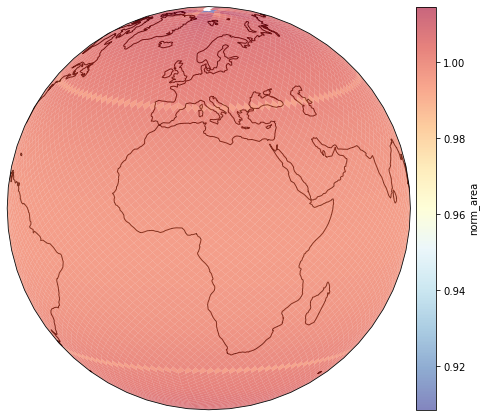

In [54]:
# matplotlib backend

cells = gv.Polygons(grids["healpy"], vdims=['norm_area']).opts(alpha=0.6, color='norm_area', cmap='RdYlBu_r', edgecolor=None)

img = gf.coastline.opts(edgecolor='black') * cells.opts(projection=ccrs.Orthographic(12, 12), global_extent=True, colorbar=True, xaxis=None, yaxis=None, show_grid=False, show_frame=False, fig_size=200)
img
# gv.save(img, "../cell_stats/results_healpy/healpy_globe_view_norm_area_order_5.png", fmt="png", dpi=300)

/home/akmoch/.local/lib/python3.10/site-packages/geoviews/operation/projection.py:99: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if proj_geom.geom_type == 'GeometryCollection' and len(proj_geom) == 0:


:Overlay
   .Coastline.I :Feature   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]   (norm_area)
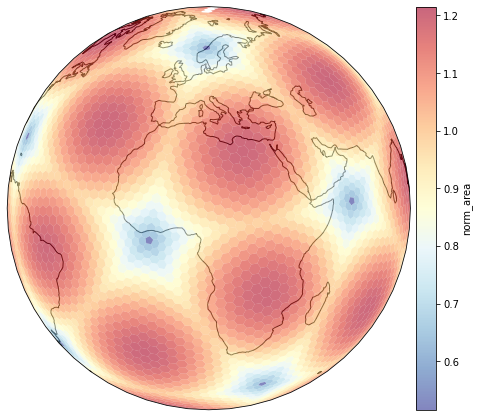

In [8]:
# matplotlib backend

cells = gv.Polygons(grids["h3"], vdims=['norm_area']).opts(alpha=0.6, color='norm_area', cmap='RdYlBu_r', edgecolor=None)

gf.coastline.opts(edgecolor='black') * cells.opts(projection=ccrs.Orthographic(12, 12), global_extent=True, colorbar=True, xaxis=None, yaxis=None, show_grid=False, show_frame=False, fig_size=200)

/home/akmoch/.local/lib/python3.10/site-packages/geoviews/operation/projection.py:99: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if proj_geom.geom_type == 'GeometryCollection' and len(proj_geom) == 0:


:Overlay
   .Coastline.I :Feature   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]   (norm_area)
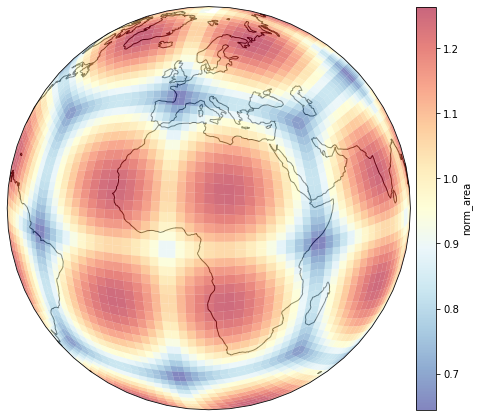

In [9]:
# matplotlib backend

cells = gv.Polygons(grids["s2"], vdims=['norm_area']).opts(alpha=0.6, color='norm_area', cmap='RdYlBu_r', edgecolor=None)

gf.coastline.opts(edgecolor='black') * cells.opts(projection=ccrs.Orthographic(12, 12), global_extent=True, colorbar=True, xaxis=None, yaxis=None, show_grid=False, show_frame=False, fig_size=200)

/Users/akmoch/micromamba/envs/daskgeo2023a/lib/python3.9/site-packages/holoviews/core/util.py:1572: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)


:Overlay
   .Coastline.I :Feature   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]   (ipq)
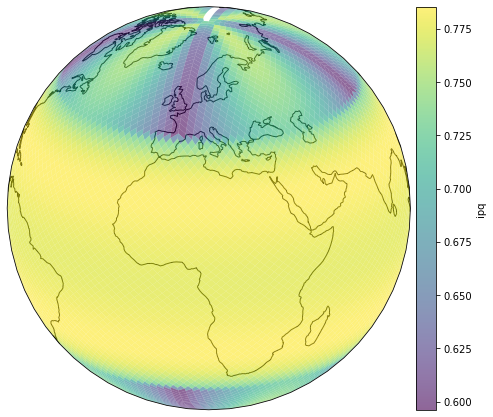

In [20]:
# matplotlib backend

cells = gv.Polygons(grids["healpy"], vdims=['ipq']).opts(alpha=0.6, color='ipq', cmap='viridis', edgecolor=None)

gf.coastline.opts(edgecolor='black') * cells.opts(projection=ccrs.Orthographic(12, 22), global_extent=True, colorbar=True, colorbar_position="bottom", xaxis=None, yaxis=None, show_grid=False, show_frame=False, fig_size=200)

In [21]:
def plot_single(d_key):
    cells = gv.Polygons(grids[d_key], vdims=['ipq']).opts(alpha=0.6, color='ipq', cmap='viridis', edgecolor=None)

    return gf.coastline.opts(edgecolor='black') * cells.opts(projection=ccrs.Orthographic(12, 22), global_extent=True, colorbar=True, xaxis=None, yaxis=None, show_grid=False, show_frame=False, fig_size=200)

/home/akmoch/.local/lib/python3.10/site-packages/geoviews/operation/projection.py:99: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if proj_geom.geom_type == 'GeometryCollection' and len(proj_geom) == 0:
/home/akmoch/.local/lib/python3.10/site-packages/geoviews/operation/projection.py:99: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if proj_geom.geom_type == 'GeometryCollection' and len(proj_geom) == 0:


:Layout
   .Overlay.TEST :Overlay
      .Coastline.I :Feature   [Longitude,Latitude]
      .Polygons.I  :Polygons   [Longitude,Latitude]   (ipq)
   .Overlay.I    :Overlay
      .Coastline.I :Feature   [Longitude,Latitude]
      .Polygons.I  :Polygons   [Longitude,Latitude]   (ipq)
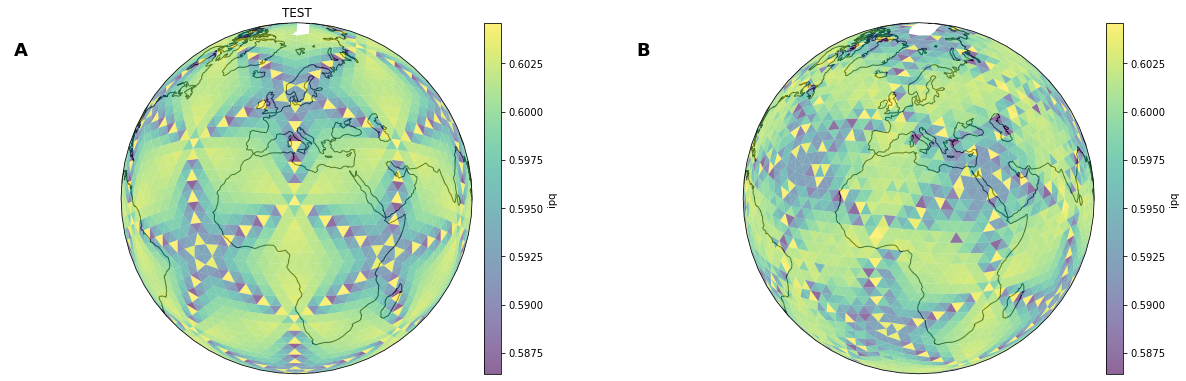

In [27]:
from holoviews import opts

# DGGRID FULLER7H / eaggr ISEA4T / DGGRID ISEA4T 

cell_opts = dict(alpha=0.6, color='ipq', cmap='viridis', edgecolor=None, global_extent=True, xaxis=None, yaxis=None, show_frame=False, projection=ccrs.Orthographic(12, 22), colorbar=True, aspect=1)
layout_opts = opts.defaults(opts.Layout(fig_size=200))

# cells = gv.Polygons(grids["rhpix"], vdims=['ipq']).
# gf.coastline.opts(edgecolor='black') * cells.opts(projection=ccrs.Orthographic(12, 22), global_extent=True, colorbar=True, colorbar_position="bottom", xaxis=None, yaxis=None, show_grid=False, show_frame=False, fig_size=200)
# .relabel(group=g[1]) for g in zip(grids, names)] )

img = gv.Layout( [ plot_single("DGGRID ISEA4T").relabel("TEST"), plot_single("eaggr ISEA4T")   ] ).opts(fontsize=16, aspect_weight=True, tight=False).cols(2)
img